Prepare a classification model using Naive Bayes 
   for salary data 

   Data Description:

   age -- age of a person
   workclass-- A work class is a grouping of work 
   education-- Education of an individuals	
   maritalstatus-- Marital status of an individulas	
   occupation	 -- occupation of an individuals
   relationship -- 	
   race --  Race of an Individual
   sex --  Gender of an Individual
   capitalgain --  profit received from the sale of an investment	
   capitalloss	-- A decrease in the value of a capital asset
   hoursperweek -- number of hours work per week	
   native -- Native of an individual
   Salary -- salary of an individual


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline

In [3]:
# Importing Training Dataset
train = pd.read_csv('SalaryData_train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Importing Testing Dataset
test = pd.read_csv('SalaryData_test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Data Exploration


In [5]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
# checking missing values for train dataset
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
#checking missing values  for test dataset
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### Their is know null values in both dataset 

In [11]:
#Checking duplicat values for train dataset
train.duplicated().sum()

3258

In [12]:
#Checking duplicat values for test dataset
test.duplicated().sum()

930

In [13]:
#droping of duplicate data
salary_train=train.copy()
salary_test=test.copy()
salary_train=train.drop_duplicates()
salary_test=test.drop_duplicates()
salary_train.shape,salary_test.shape

((26903, 14), (14130, 14))

In [14]:
# List of Numerical Variables 
numerical_features=[feature for feature in salary_train.columns if salary_train[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
salary_train[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


#### The number of numeric variables is 5  

In [15]:
# categorical variables 

categorical = [var for var in salary_train.columns if salary_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [16]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', len(salary_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


#### We can see that native column contains relatively large number of labels as compared to other columns.

In [17]:
# correlation of features
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


### Exploratory Data Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

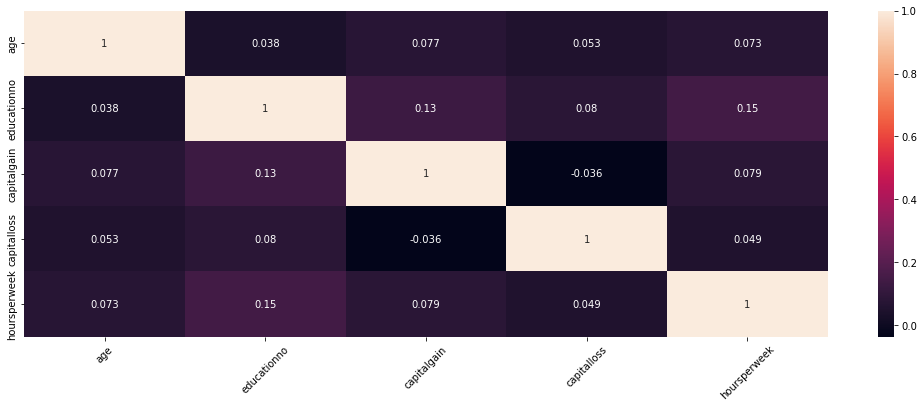

In [18]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(salary_train.corr(), annot=True);
plt.xticks(rotation=45)

#### The scatter matrix does not reveal any clear relationship among age, education, capitalgain, capitalloss and Hoursperweek.

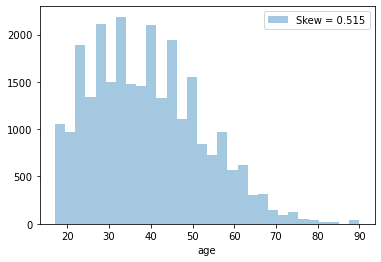

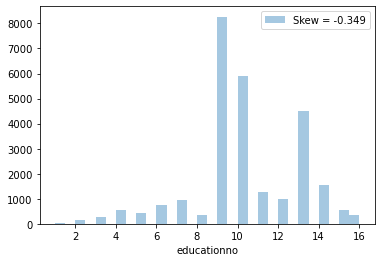

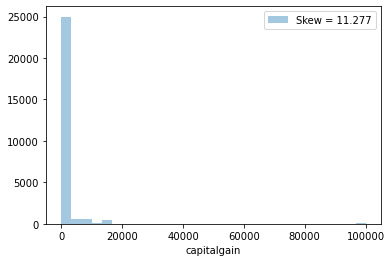

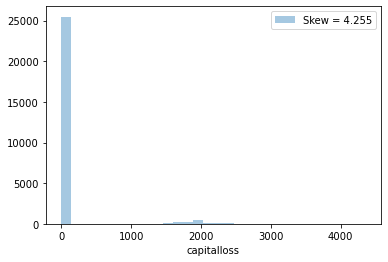

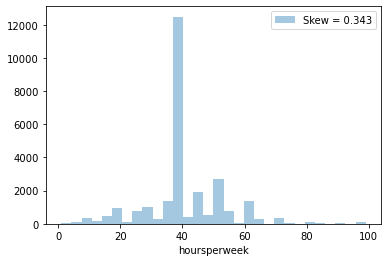

In [19]:
# Histogram of numeric varaibles
for feat in numerical_features:
    skew = salary_train[feat].skew()
    sns.distplot(salary_train[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [20]:
salary_train[['age','hoursperweek']].describe()

,age,hoursperweek
count,26903.000000,26903.000000
mean,39.049140,41.164591
std,13.188825,12.347051
min,17.000000,1.000000
25%,29.000000,40.000000
50%,38.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


##### we have an extensive age range, from 17 to 90 years old. However, a majority of them are in the age of 20s and 40s (29 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly right skewed with a small standard deviation
##### The range of working hours per week is still fairly similar, from a minimum of 1 to a maximum of 99 hours, giving a range of 99 Hours. The distribution of balance is leptokurtica and fairly normally distributed

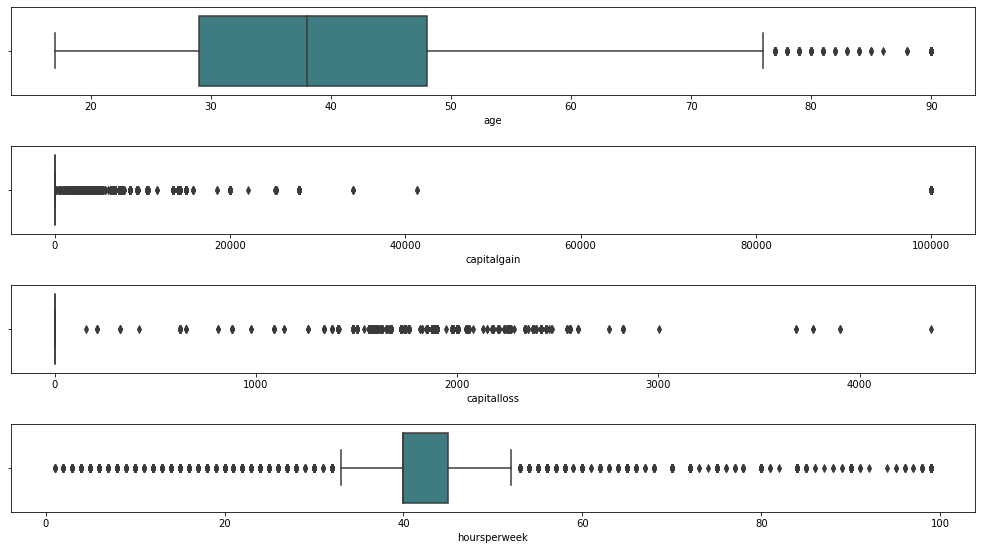

In [21]:
# outliers Detection
outlier=salary_train.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### Visualization of numeric features w.r.t. salary

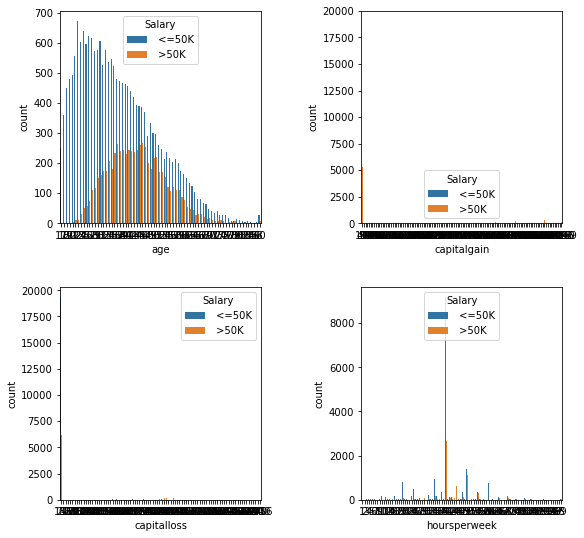

In [22]:

fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
sns.countplot(x="age", data=salary_train, hue='Salary',ax=axes[0][0])
sns.countplot(x="capitalgain", data=salary_train, hue='Salary',ax=axes[0][1])
sns.countplot(x="capitalloss", data=salary_train, hue='Salary',ax=axes[1][0])
sns.countplot(x="hoursperweek", data=salary_train, hue='Salary',ax=axes[1][1])
plt.show()

### Visualization of catogerical feature w.r.t. salary

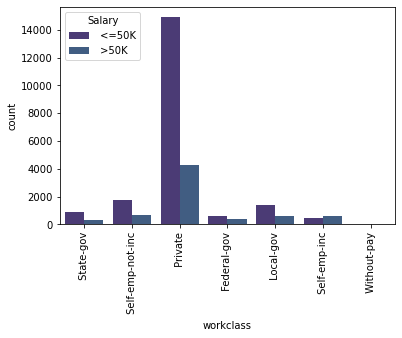

In [23]:
pal = sns.color_palette("viridis")
sns.countplot(x="workclass", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

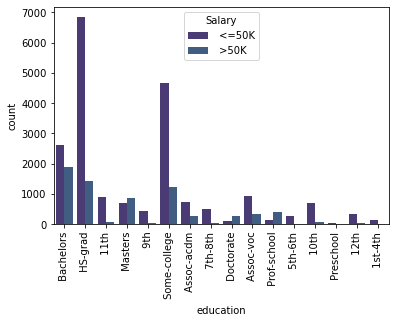

In [24]:
sns.countplot(x="education", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

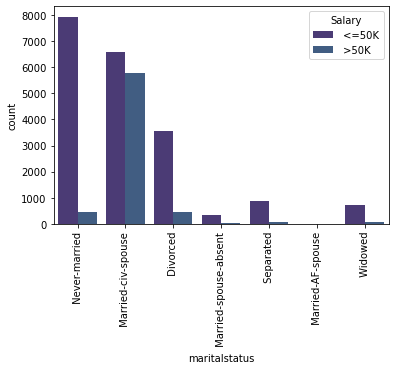

In [25]:
sns.countplot(x="maritalstatus", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

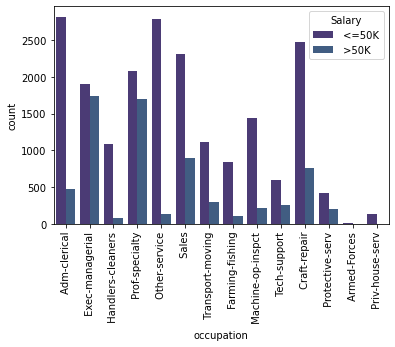

In [26]:
sns.countplot(x="occupation", data=salary_train, palette=pal,hue='Salary')
plt.xticks(rotation=90)
plt.show()

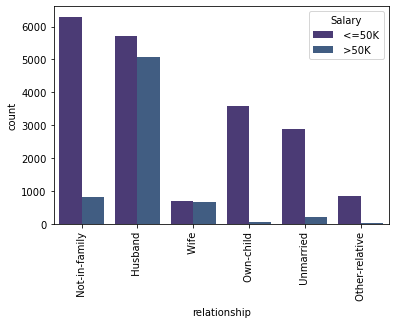

In [27]:
sns.countplot(x="relationship", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

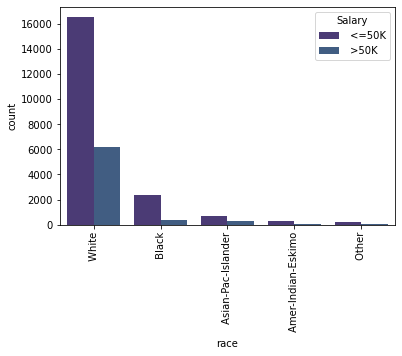

In [28]:
sns.countplot(x="race", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

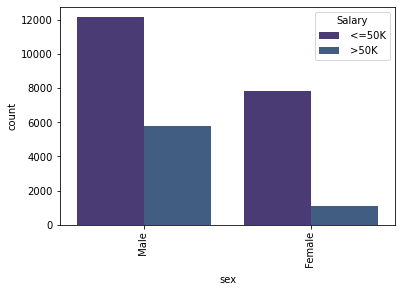

In [29]:
sns.countplot(x="sex", data=salary_train,palette=pal, hue='Salary')
plt.xticks(rotation=90)
plt.show()

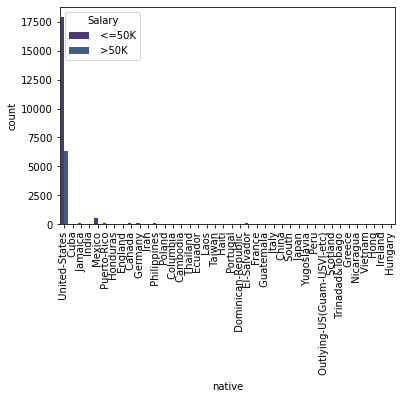

In [30]:
sns.countplot(x="native", data=salary_train, palette=pal,hue='Salary')
plt.xticks(rotation=90)
plt.show()

### Pie plot  for visualization of Salary

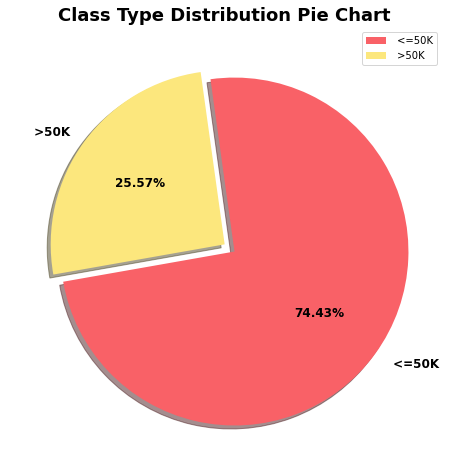

In [31]:
plt.figure(figsize = (12,8))
plt.pie(salary_train['Salary'].value_counts(),
       labels=salary_train.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## Data pre-processing

In [32]:
data_train=salary_train.copy()
data_test=salary_test.copy()

# LabelEncoder for catogerical features 
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in categorical:
    data_train[i]=label_encoder.fit_transform(data_train[i])
    data_test[i]=label_encoder.fit_transform(data_test[i])

In [33]:
# train test data split 
X_train=data_train.drop('Salary',axis=1)
y_train=data_train['Salary']
X_test=data_test.drop('Salary',axis=1)
y_test=data_test['Salary']
y_train.shape,y_test.shape


((26903,), (14130,))

## Build Model for NaiveBayes Classifier 

In [34]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
# instantiating the model
model_1 = CategoricalNB()
model_2 = MultinomialNB()
model_3 = GaussianNB()
# fit the model
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

GaussianNB()

In [35]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report as report
from sklearn.metrics import roc_curve, roc_auc_score , recall_score , precision_score, f1_score
#Predictions
y_pred = model_1.predict(X_test)
y_pred1 = model_2.predict(X_test)
y_pred2 = model_3.predict(X_test)

print('CategoricalNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

CategoricalNB Model accuracy score: 0.8539
MultinomialNB Model accuracy score: 0.7734
GaussianNB Model accuracy score: 0.7952


In [36]:
# print the classification report

print('CategoricalNB Model',report(y_test, y_pred))
print('MultinomialNB Model',report(y_test, y_pred1))
print('GaussianNB Model',report(y_test, y_pred2))

CategoricalNB Model               precision    recall  f1-score   support

           0       0.89      0.92      0.90     10620
           1       0.73      0.66      0.69      3510

    accuracy                           0.85     14130
   macro avg       0.81      0.79      0.80     14130
weighted avg       0.85      0.85      0.85     14130

MultinomialNB Model               precision    recall  f1-score   support

           0       0.79      0.96      0.86     10620
           1       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130

GaussianNB Model               precision    recall  f1-score   support

           0       0.81      0.95      0.87     10620
           1       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg     

####  As we observe Categorical Naive Bayes  givest better result so  we are going to continue using the Categorical Model for further Metrics

### Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.3f}%'.format(model_1.score(X_train, y_train)*100))

print('Test set score: {:.3f}%'.format(model_1.score(X_test, y_test)*100))

Training set score: 85.392%
Test set score: 85.393%


##### The training-set accuracy score is 0.85392 while the test-set accuracy to be 0.85393. These two values are almost same. So, there is no sign of overfitting.

###  Confusion matrix

In [38]:
y_predict = model_1.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[9753  867]
 [1197 2313]]


<AxesSubplot:>

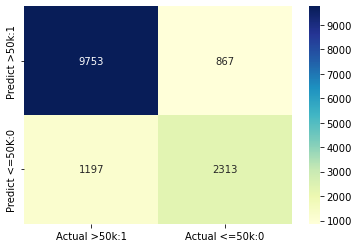

In [39]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual >50k:1', 'Actual <=50k:0'], 
                                 index=['Predict >50k:1', 'Predict <=50K:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [40]:
# save confusion matrix and slice into four pieces
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')

Classification accuracy : 0.8539


In [41]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification error : {round(classification_error,4)}')

Classification error : 0.1461


### Precision

In [42]:
# When a positive value is predicted, how often is the prediction correct?
precision = TP / float(TP + FP)
print(f'Precision : {round(precision,4)}')

Precision : 0.9184


### Recall

In [43]:
# When the actual value is positive, how often is the prediction correct?
recall = TP / float(TP + FN)
print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.8907


### Adjusting the threshold level

In [44]:
# print the predicted probabilities of two classes- 0 and 1
y_pred_prob = model_1.predict_proba(X_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of salary <=50k(0)',
                                                         'Prob of salary>50k (1)'])

y_pred_prob_df

,Prob of salary <=50k(0),Prob of salary>50k (1)
0,0.999999,0.000001
1,0.753483,0.246517
2,0.637158,0.362842
3,0.009876,0.990124
4,0.999988,0.000012
...,...,...
14125,0.993402,0.006598
14126,0.954107,0.045893
14127,0.040967,0.959033
14128,0.998109,0.001891


In [45]:
# try different Threshold
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall


In [46]:
from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = model_1.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1,threshold=i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i/10,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)    

In [47]:
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,0.1,10620.0,2243.0,457.0,0.788795,0.948268
1,0.2,10620.0,1715.0,676.0,0.838512,0.929444
2,0.3,10620.0,1383.0,848.0,0.869774,0.915915
3,0.4,10620.0,1088.0,1030.0,0.897552,0.902481
4,0.5,10620.0,867.0,1197.0,0.918362,0.890685
5,0.6,10620.0,697.0,1365.0,0.934369,0.879075
6,0.7,10620.0,544.0,1512.0,0.948776,0.86952
7,0.8,10620.0,410.0,1689.0,0.961394,0.858055
8,0.9,10620.0,269.0,1938.0,0.97467,0.842298


### ROC_ AUC

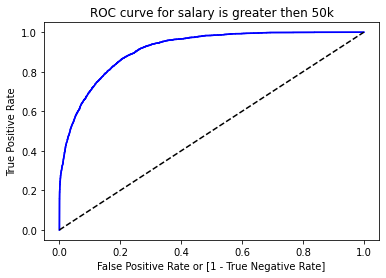

AUC-ROC Score: 0.9135184648649809


In [48]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_test, y_pred1)
plt.plot(fpr,tpr,color='blue')
auc=roc_auc_score(y_test,y_pred1)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for salary is greater then 50k')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

### Conclusion 
+ When we build models we find that Categorical NaiveBayes Classifier model gives the best accuracy which is 0.8539. The model yields a very good performance to predict whether a person makes over 50K a year

+ The training-set accuracy score is 85.392% while the test-set accuracy to be 85.393%. These two values are almost same. So, there is no sign of overfitting

+ ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier does a good job in predicting whether an employee salary will be greater or lesser than 50k
